In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.model_selection import learning_curve

In [23]:
# Pastikan file magic04.data ada di lokasi yang sesuai
file_path = "magic04.data"

# Menentukan nama kolom berdasarkan deskripsi dataset MAGIC Gamma Telescope
columns = [
    "fLength",        # Panjang distribusi
    "fWidth",         # Lebar distribusi
    "fSize",          # Ukuran distribusi
    "fConc",          # Konsentrasi
    "fConc1",         # Konsentrasi di piksel terang
    "fAsym",          # Asimetri distribusi
    "fM3Long",        # Momen ketiga distribusi
    "fM3Trans",       # Momen ketiga transversal
    "fAlpha",         # Sudut alpha
    "fDist",          # Jarak dari sumbu
    "class"           # Label: "g" (gamma) atau "h" (hadron)
]

# Membaca data dengan nama kolom
df = pd.read_csv(file_path, header=None, names=columns)

# Menyesuaikan kolom label menjadi biner (0 untuk "h", 1 untuk "g")
df['label'] = df['class'].map({'g': 1, 'h': 0})

# Menghapus kolom asli 'class' jika tidak diperlukan
df = df.drop(columns=['class'])

# Menampilkan beberapa baris dari dataset
print(df.head())

    fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  label  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1  


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  label     19020 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 1.6 MB
None

Statistik deskriptif dataset:
            fLength        fWidth         fSize         fConc        fConc1  \
count  19020.000000  19020.000000  19020.000000  19020.000000  19020.000000   
mean      53.250154     22.180966      2.825017      0.380327      0.214657   
std       42.364855     18.346056      0.

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_28260\2429001744.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='viridis')


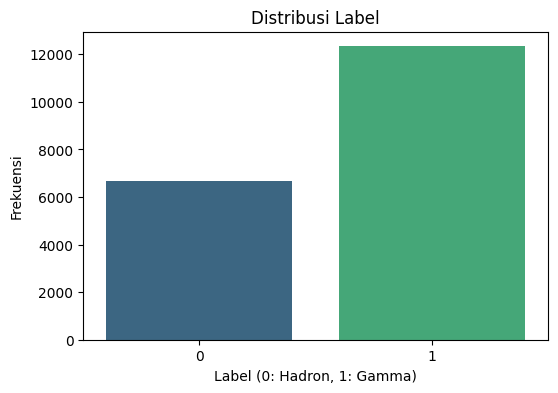

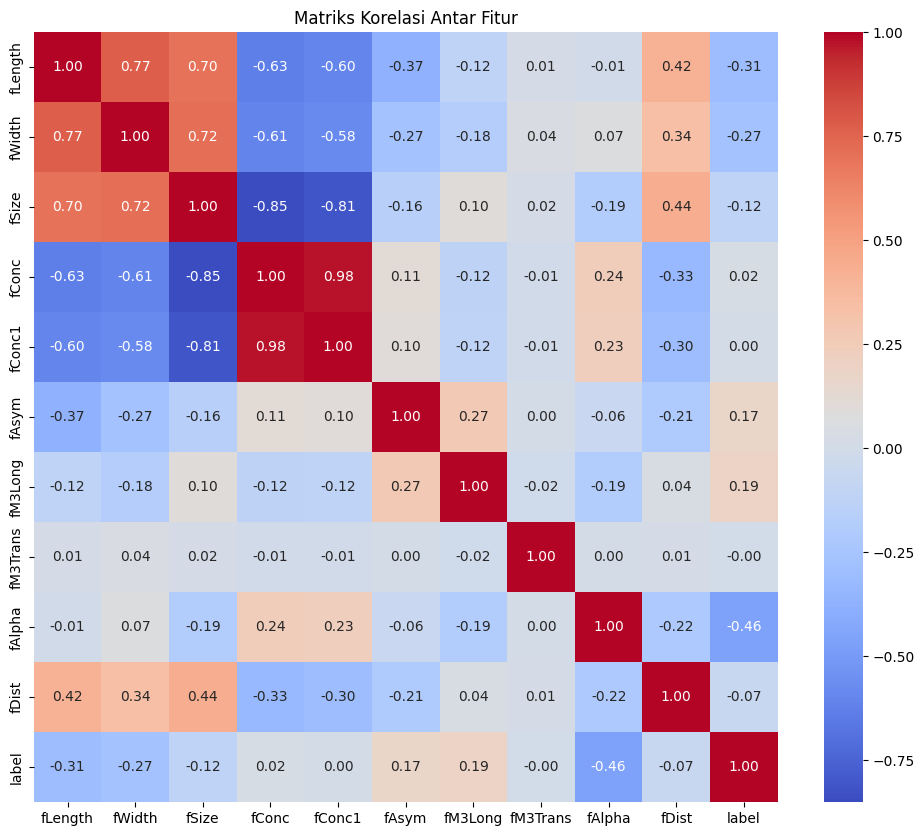

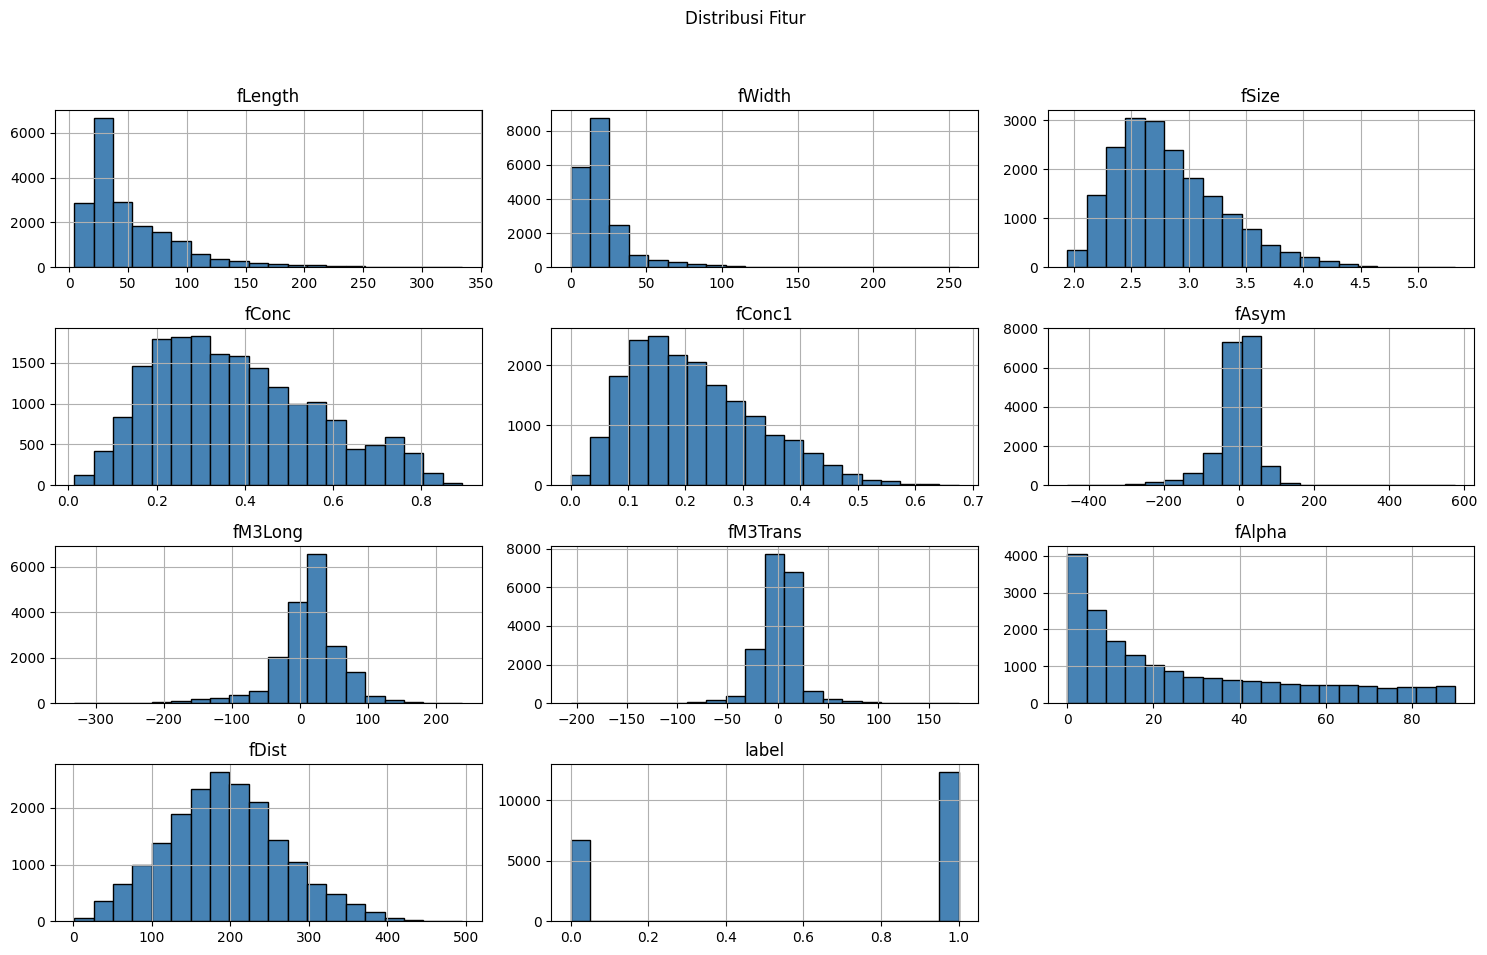

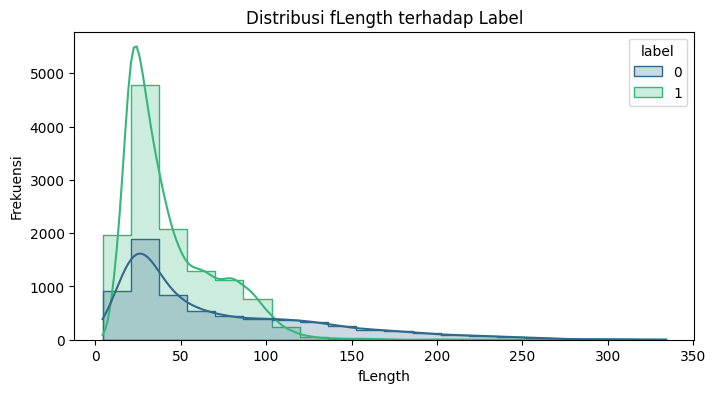

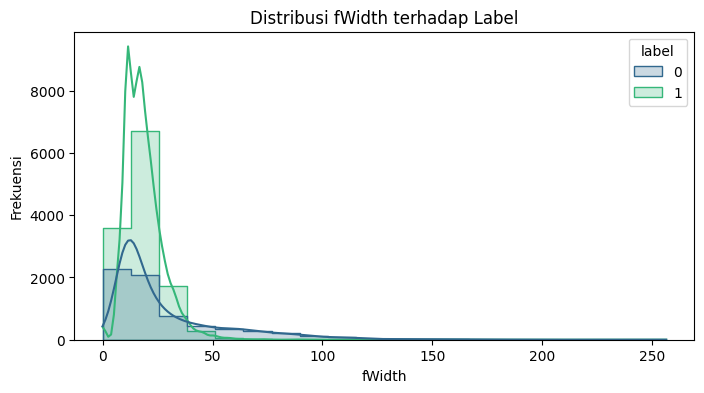

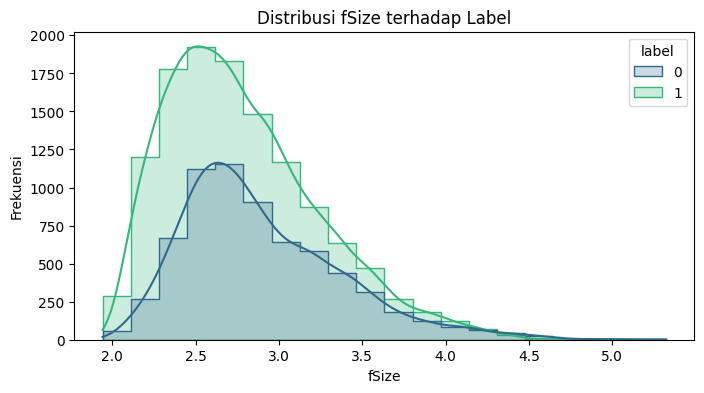

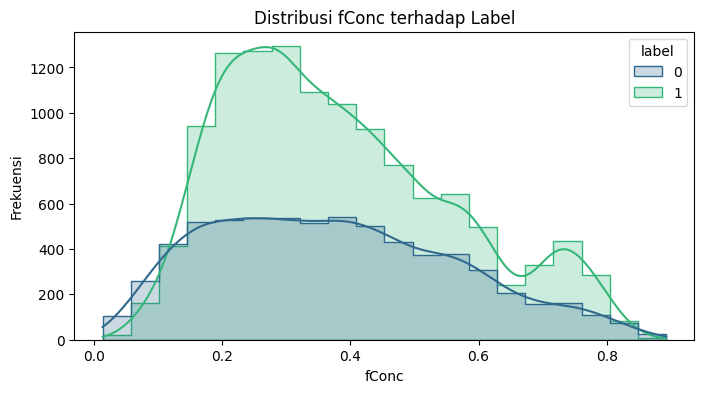

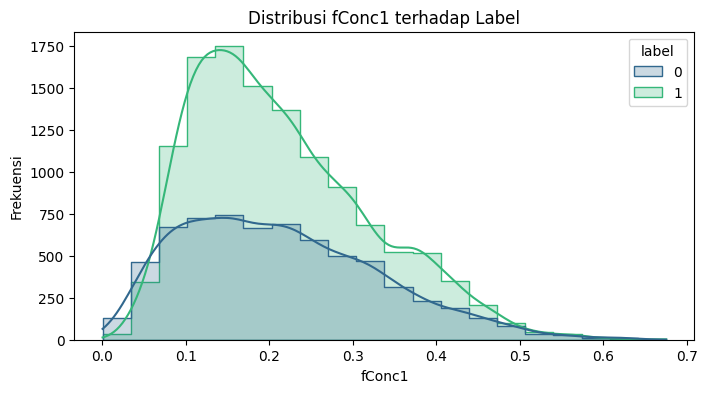

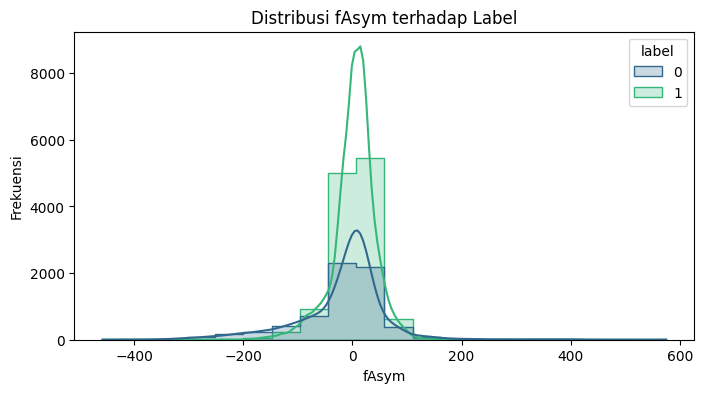

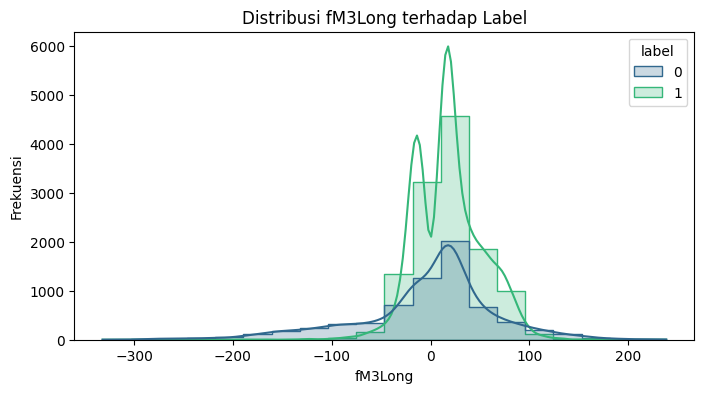

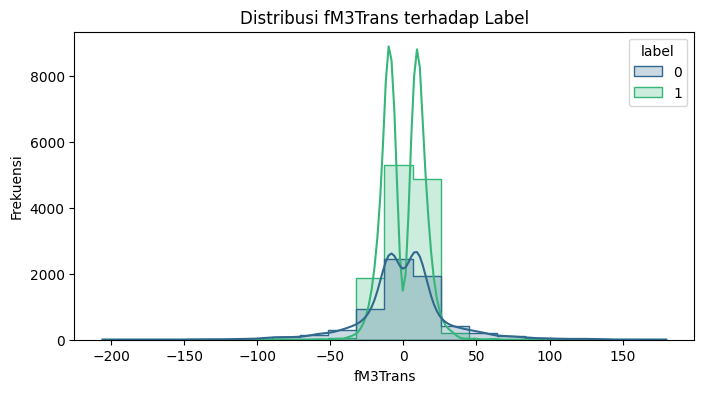

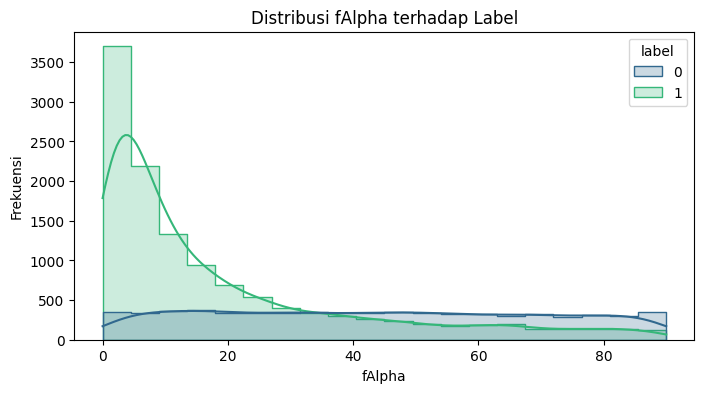

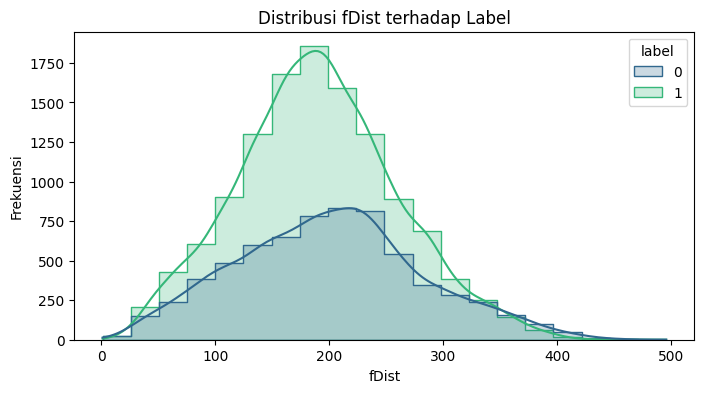

In [24]:
# Melihat informasi dasar dari dataset
print("Informasi dataset:")
print(df.info())

# Melihat statistik deskriptif
print("\nStatistik deskriptif dataset:")
print(df.describe())

# Visualisasi distribusi label
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df, palette='viridis')
plt.title('Distribusi Label')
plt.xlabel('Label (0: Hadron, 1: Gamma)')
plt.ylabel('Frekuensi')
plt.show()

# Korelasi antar fitur
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Matriks Korelasi Antar Fitur')
plt.show()

# Histogram setiap fitur
df.hist(bins=20, figsize=(15, 10), color='steelblue', edgecolor='black')
plt.suptitle('Distribusi Fitur')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Analisis distribusi fitur terhadap label
for column in df.columns[:-1]:  # Mengabaikan kolom label
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=column, hue='label', bins=20, kde=True, palette='viridis', element='step')
    plt.title(f'Distribusi {column} terhadap Label')
    plt.xlabel(column)
    plt.ylabel('Frekuensi')
    plt.show()

In [25]:
# Memisahkan fitur dan label
X = df.drop('label', axis=1)  # Semua kolom kecuali label
y = df['label']              # Kolom label

# Membagi dataset menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur
scaler = StandardScaler()    # Inisialisasi StandardScaler
X_train = scaler.fit_transform(X_train)  # Normalisasi data pelatihan
X_test = scaler.transform(X_test)        # Normalisasi data pengujian

# Menampilkan informasi hasil preprocessing
print("Dimensi data pelatihan:", X_train.shape)
print("Dimensi data pengujian:", X_test.shape)
print("Contoh data pelatihan setelah normalisasi:\n", X_train[:5])
print("Contoh label pelatihan:\n", y_train[:5].values)

Dimensi data pelatihan: (15216, 10)
Dimensi data pengujian: (3804, 10)
Contoh data pelatihan setelah normalisasi:
 [[-0.54294179 -0.62738866 -0.64590104  0.26051989  0.52311744  0.0645751
  -0.46014325 -0.21610391  1.47665244 -0.8437807 ]
 [-0.66573322 -0.50919261 -0.80101361  0.49466661  0.39620272  0.43577801
  -0.03763703 -0.36543949 -0.04132548 -0.51586452]
 [-0.69143496 -0.34756347 -0.53141822  0.18973135  0.28278956  0.40780535
  -0.36310239  0.2093676   0.12281918 -0.82694425]
 [-0.15859792  0.35880962  1.20910144 -1.05723605 -1.03766366  0.37024902
   0.69406817  0.48657481 -0.56756861 -1.15677275]
 [-0.9012458  -0.40154978 -1.25767518  2.06835036  1.49973076  0.43157162
  -0.27038628 -0.40265395  1.35308795  0.80022527]]
Contoh label pelatihan:
 [1 1 1 1 0]


In [26]:
# Preprocessing data (seperti pada langkah sebelumnya)
X = df.drop('label', axis=1)
y = df['label']

# Membagi dataset menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Membuat model K-Nearest Neighbor
knn = KNeighborsClassifier(n_neighbors=5)  # Menggunakan 5 tetangga terdekat

# Melatih model
knn.fit(X_train, y_train)

# Evaluasi model
y_pred = knn.predict(X_test)

# Menampilkan metrik evaluasi
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(f"{accuracy_score(y_test, y_pred):.2f}")

Confusion Matrix:
[[ 879  465]
 [ 165 2295]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.65      0.74      1344
           1       0.83      0.93      0.88      2460

    accuracy                           0.83      3804
   macro avg       0.84      0.79      0.81      3804
weighted avg       0.84      0.83      0.83      3804


Accuracy Score:
0.83


Akurasi:
0.83

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.84      0.65      0.74      1344
           1       0.83      0.93      0.88      2460

    accuracy                           0.83      3804
   macro avg       0.84      0.79      0.81      3804
weighted avg       0.84      0.83      0.83      3804


Matriks Kebingungan:
[[ 879  465]
 [ 165 2295]]


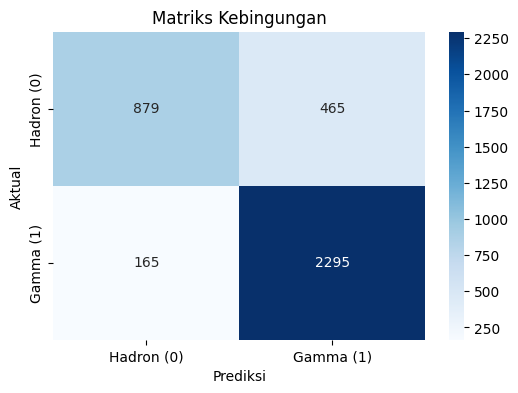

In [27]:
# Prediksi label untuk set pengujian
y_pred = knn.predict(X_test)

# Menghitung matriks kebingungan
cm = confusion_matrix(y_test, y_pred)

# Menghitung laporan klasifikasi
report = classification_report(y_test, y_pred, output_dict=True)

# Menampilkan hasil evaluasi
print("Akurasi:")
print(f"{accuracy_score(y_test, y_pred):.2f}")

print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))

print("\nMatriks Kebingungan:")
print(cm)

# Visualisasi Matriks Kebingungan
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Hadron (0)', 'Gamma (1)'], yticklabels=['Hadron (0)', 'Gamma (1)'])
plt.title('Matriks Kebingungan')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

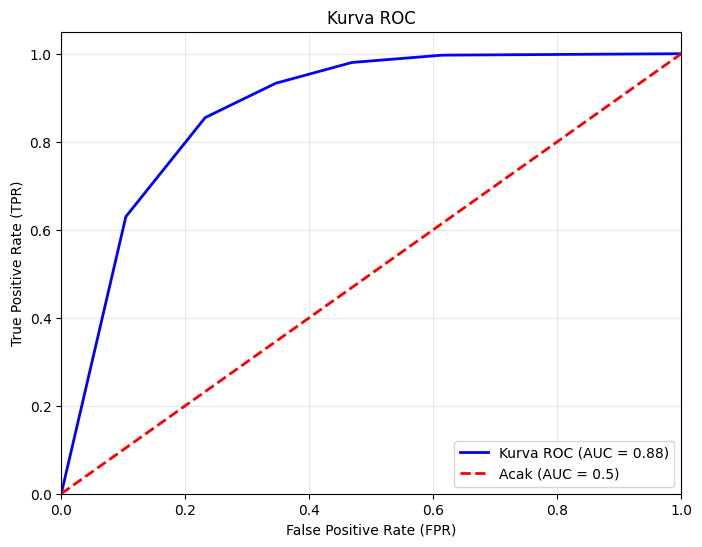

Area Under the Curve (AUC): 0.88


In [28]:
# Menghitung probabilitas prediksi
y_prob = knn.predict_proba(X_test)[:, 1]  # Probabilitas untuk kelas positif (1)

# Menghitung nilai ROC dan AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)  # False Positive Rate dan True Positive Rate
roc_auc = auc(fpr, tpr)  # Area Under the Curve (AUC)

# Visualisasi Kurva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Kurva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Acak (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Kurva ROC')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

# Menampilkan nilai AUC
print(f"Area Under the Curve (AUC): {roc_auc:.2f}")

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_28260\612949601.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette="viridis")


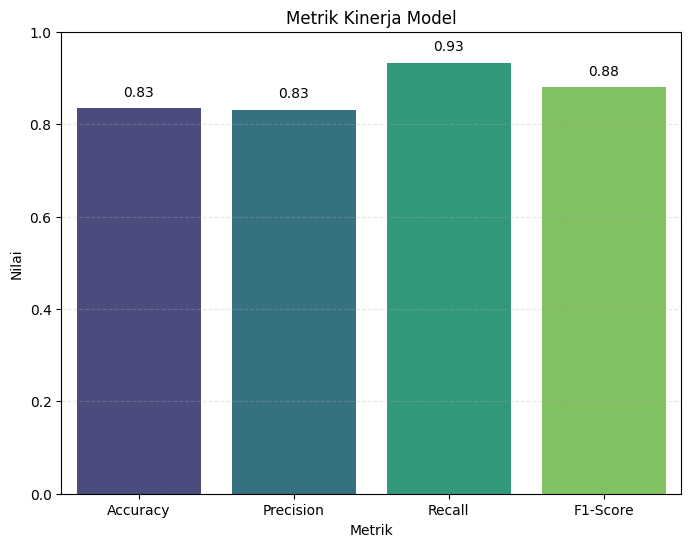

In [29]:

# Mengambil metrik dari laporan klasifikasi
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [
    report['accuracy'],          # Akurasi model
    report['1']['precision'],    # Precision untuk kelas positif (1)
    report['1']['recall'],       # Recall untuk kelas positif (1)
    report['1']['f1-score']      # F1-Score untuk kelas positif (1)
]

# Visualisasi Metrik Kinerja
plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=values, palette="viridis")
plt.title('Metrik Kinerja Model')
plt.ylabel('Nilai')
plt.xlabel('Metrik')
plt.ylim(0, 1)  # Batas nilai antara 0 dan 1
plt.grid(alpha=0.3, linestyle='--', axis='y')
for i, value in enumerate(values):  # Menambahkan label nilai di atas bar
    plt.text(i, value + 0.02, f"{value:.2f}", ha='center', va='bottom', fontsize=10)
plt.show()

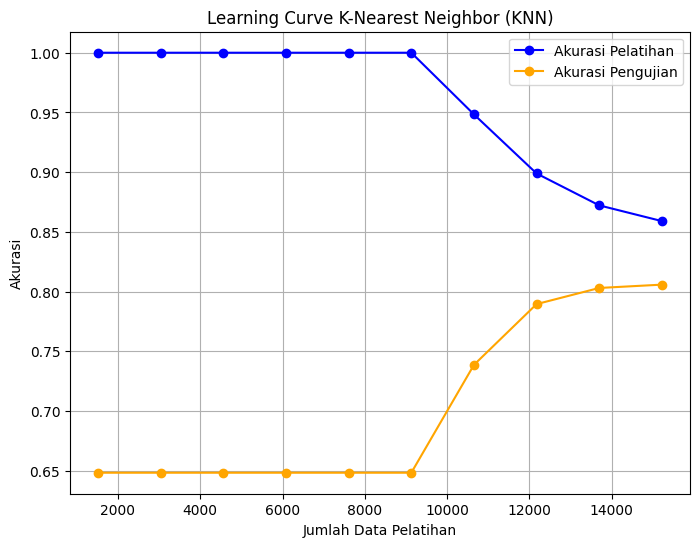

In [30]:
# Menghitung learning curve
train_sizes, train_scores, test_scores = learning_curve(
    knn, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Menghitung nilai rata-rata untuk masing-masing ukuran data
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Visualisasi Learning Curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Akurasi Pelatihan', color='blue', marker='o')
plt.plot(train_sizes, test_scores_mean, label='Akurasi Pengujian', color='orange', marker='o')
plt.title('Learning Curve K-Nearest Neighbor (KNN)')
plt.xlabel('Jumlah Data Pelatihan')
plt.ylabel('Akurasi')
plt.legend(loc='best')
plt.grid(True)
plt.show()